本次实验以AAAI 2014会议论文数据为基础，要求实现或调用无监督聚类算法，了解聚类方法。

### 任务介绍
每年国际上召开的大大小小学术会议不计其数，发表了非常多的论文。在计算机领域的一些大型学术会议上，一次就可以发表涉及各个方向的几百篇论文。按论文的主题、内容进行聚类，有助于人们高效地查找和获得所需要的论文。本案例数据来源于AAAI 2014上发表的约400篇文章，由[UCI](https://archive.ics.uci.edu/ml/datasets/AAAI+2014+Accepted+Papers!)公开提供，提供包括标题、作者、关键词、摘要在内的信息，希望大家能根据这些信息，合理地构造特征向量来表示这些论文，并设计实现或调用聚类算法对论文进行聚类。最后也可以对聚类结果进行观察，看每一类都是什么样的论文，是否有一些主题。

基本要求：
1. 将文本转化为向量，实现或调用无监督聚类算法，对论文聚类，例如10类（可使用已有工具包例如sklearn）；
2. 观察每一类中的论文，调整算法使结果较为合理；
3. 无监督聚类没有标签，效果较难评价，因此没有硬性指标，跑通即可，主要让大家了解和感受聚类算法，比较简单。

扩展要求：
1. 对文本向量进行降维，并将聚类结果可视化成散点图。

注：group和topic也不能完全算是标签，因为
1. 有些文章作者投稿时可能会选择某个group/topic但实际和另外group/topic也相关甚至更相关；
2. 一篇文章可能有多个group和topic，作为标签会出现有的文章同属多个类别，这里暂不考虑这样的聚类；
3. group和topic的取值很多，但聚类常常希望指定聚合成出例如5/10/20类；
4. 感兴趣但同学可以思考利用group和topic信息来量化评价无监督聚类结果，不作要求。

提示：
1. 高维向量的降维旨在去除一些高相关性的特征维度，保留最有用的信息，用更低维的向量表示高维数据，常用的方法有PCA和t-SNE等；
2. 降维与聚类是两件不同的事情，聚类实际上在降维前的高维向量和降维后的低维向量上都可以进行，结果也可能截然不同；
3. 高维向量做聚类，降维可视化后若有同一类的点不在一起，是正常的。在高维空间中它们可能是在一起的，降维后损失了一些信息。

In [1]:
# 1. 将文本转化为向量，实现或调用无监督聚类算法，对论文聚类，例如10类（可使用已有工具包例如sklearn）；
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

data_path = './data/[UCI] AAAI-14 Accepted Papers - Papers.csv'
df = pd.read_csv(data_path, sep=',', header=0)
df_bak = df.copy()
df = df.drop(columns=['groups', 'topics'])
# 加载停用词
stop_words = []
for word in open('./stopwords-en.txt', encoding='utf8', mode='r'):
    stop_words.append(word.strip())
# TF-DIF
vectorizer = TfidfVectorizer(stop_words=stop_words)
# 向量化方式1：按照列分别向量化，再组装到一起（好处是能根据列分配权重）
# feat_arr = [ [i] for i in range(df.shape[0]) ]
# for col in df.columns:
#     feat_vectors = vectorizer.fit_transform(df[col])
#     print(vectorizer.get_feature_names_out().shape)
#     feat_vectors_arr = feat_vectors.toarray()
#     feat_arr = np.concatenate((feat_arr, feat_vectors_arr), axis=1)
# feat_arr = np.delete(feat_arr, 0, axis=1) # 删除第一列辅助列

# 向量化方式2：将各列拼接，再向量化（好处是能提高重要词的出现频次）
arr = [ ' '.join(df.loc[i]) for i in range(df.shape[0])]
feat_vectors = vectorizer.fit_transform(arr)
feat_arr = feat_vectors.toarray()
print(vectorizer.get_feature_names_out().shape)


(6908,)


#### 向量化方式2（各列拼接，再向量化）相比较于向量化方式1（按照列分别向量化，再组装到一起），得到的聚类评价指标calinski harabasz score如下：
|       | n_cluster = 2 | n_cluster = 3 | n_cluster = 5 | n_cluster = 10 | n_cluster = 20 | n_cluster = 50 |
| :-----: | ---- | ---- | ---- | ---- | ---- | ---- |
| 向量化方式1 | 2.7844 | 2.1152 | 2.0300 | 1.6737 | 1.5382 | 1.4828 |
| 向量化方式2 | 3.4131 | 2.7108 | 2.2431 | 1.9044 | 1.7652 | 1.6727 |
#### 由以上数据可知，向量化方式2优于向量化方式1，本实验采用向量化方式2。


-------------------- n_clusters = 2 --------------------
[0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0
 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0
 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1
 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0
 1 1 0 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1
 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0
 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 1
 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0
 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1
 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0]
8
calinski_harabasz_score = 3.413113603721316
-------------------- n_clusters = 3 --------------------
[1 1 0 0 1 1 2 1 2 1 2 2 1 0 2 2

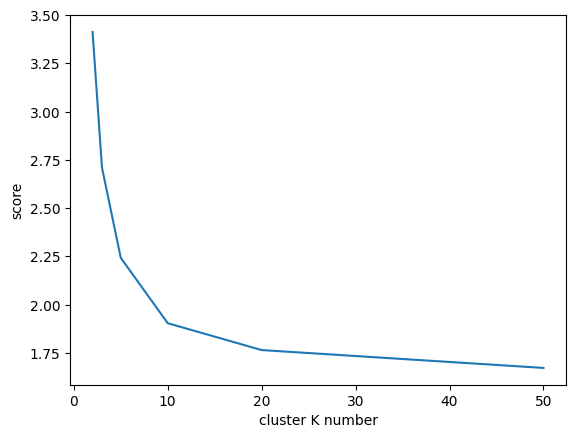

In [2]:
# 2. 观察每一类中的论文，调整算法使结果较为合理；
# 将聚类结果写入csv文件
import os
import matplotlib.pyplot as plt
from sklearn.metrics import calinski_harabasz_score

cluster_numbers = [2, 3, 5, 10, 20, 50]
scores = []
for n_clusters in cluster_numbers:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(feat_arr)
    print('-------------------- n_clusters =', n_clusters, '--------------------')
    print(kmeans.labels_)
    print(kmeans.n_iter_)
    score = calinski_harabasz_score(feat_arr, kmeans.labels_)
    scores.append(score)
    print('calinski_harabasz_score = ' + str(score))
    # 将分类结果写入文件
    dest_dir = './' + str(n_clusters)
    if not os.path.exists(dest_dir):
        os.mkdir(dest_dir)
    for i in range(n_clusters):
        df_bak[kmeans.labels_==i].to_csv(dest_dir + '/k-means-result-' + str(n_clusters) + '-' + str(i) + '.csv', columns=df_bak.columns, index=False)

plt.plot(cluster_numbers, scores)
plt.xlabel('cluster K number')
plt.ylabel('score')
plt.show()

#### 根据n_clusters=[2, 3, 5, 10, 20, 50]时得到的分类结果文件，发现同groups, topics属性并没有强相关性

In [3]:
# 3. 无监督聚类没有标签，效果较难评价，因此没有硬性指标，跑通即可，主要让大家了解和感受聚类算法，比较简单。


#### 由以上图示，随着K值增大，聚类评价指标calinski harabasz score逐渐降低，所以选择 K=2较为合理

[0.0127607  0.00868151]


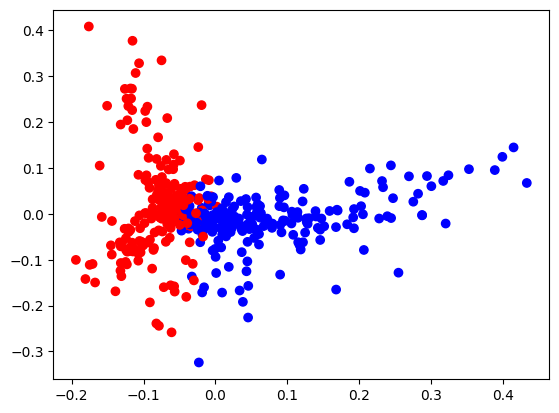

In [4]:
# 扩展要求：对文本向量进行降维，并将聚类结果可视化成散点图。
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=2, random_state=0).fit(feat_arr)
pca = PCA(n_components=2, random_state=0)
pca_feat_arr = pca.fit_transform(feat_arr)
print(pca.explained_variance_ratio_)

colors = [ 'b' if i == 0 else 'r' for i in kmeans.labels_ ]
plt.scatter(pca_feat_arr[:,0], pca_feat_arr[:,1], c=colors)
plt.show()

#### 以上图示为利用PCA降维到二维后散点图。